<a href="https://colab.research.google.com/github/Vyshnavi153/Prediction-of-Risk-of-Heart-Disease---Machine-Learning/blob/main/Prediction_of_Risk_of_Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install imbalanced-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_health_indicators_BRFSS2015.csv to heart_disease_health_indicators_BRFSS2015.csv


In [ ]:
heart_df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
heart_df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
c = 0
for i in heart_df:
    print(heart_df.columns[c], heart_df[i].unique())
    c = c + 1

HeartDiseaseorAttack [0. 1.]
HighBP [1. 0.]
HighChol [1. 0.]
CholCheck [1. 0.]
BMI [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker [1. 0.]
Stroke [0. 1.]
Diabetes [0. 2. 1.]
PhysActivity [0. 1.]
Fruits [0. 1.]
Veggies [1. 0.]
HvyAlcoholConsump [0. 1.]
AnyHealthcare [1. 0.]
NoDocbcCost [0. 1.]
GenHlth [5. 3. 2. 4. 1.]
MentHlth [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
PhysHlth [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
DiffWalk [1. 0.]
Sex [0. 1.]
Age [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]
Education [4. 6. 3. 5

In [ ]:
#checking for missing values
heart_df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

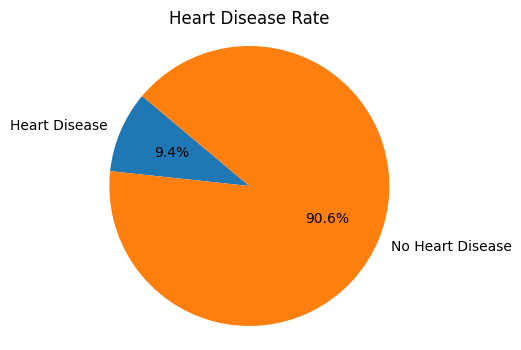

In [ ]:
#EDA
hd = (heart_df["HeartDiseaseorAttack"] == 1.0).sum()
nohd = (heart_df["HeartDiseaseorAttack"] == 0.0).sum()

sizes = [hd, nohd]
labels = ['Heart Disease', 'No Heart Disease']

plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Heart Disease Rate')

plt.axis('equal')
plt.show()

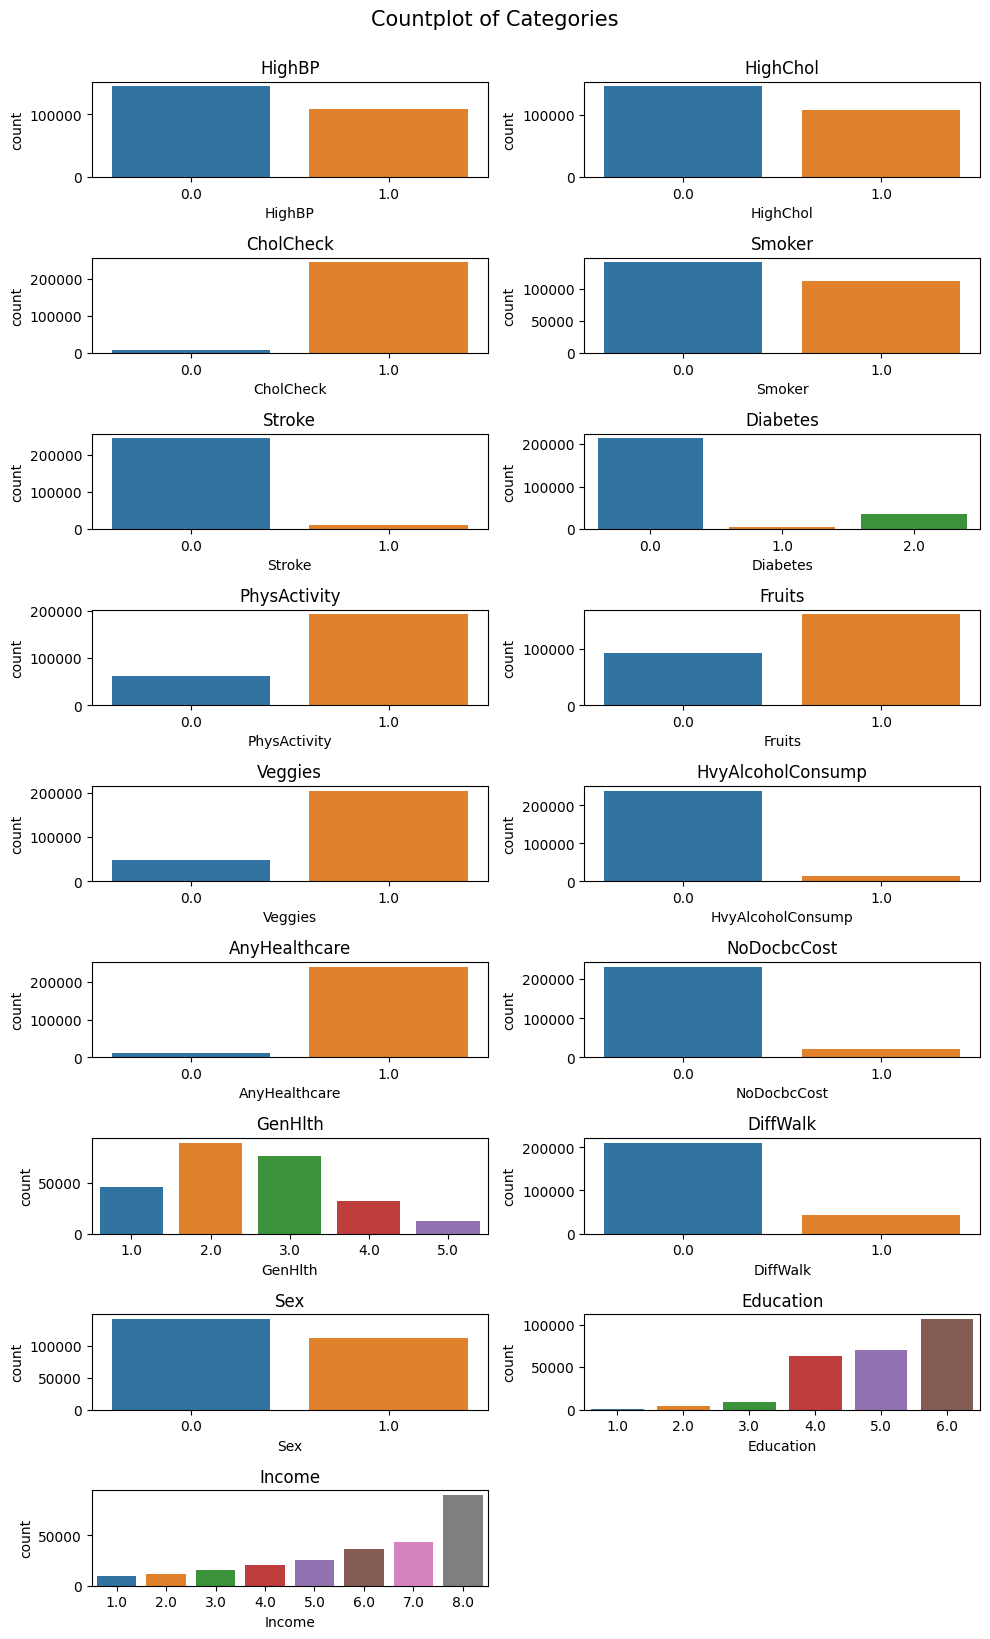

In [ ]:
heart_df.columns
col = ['HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Education',
       'Income']
plt.figure(figsize=(10,30))
for i,column in enumerate(col):
    plt.subplot(len(col), 2, i+1)
    plt.suptitle("Countplot of Categories", fontsize=15, x=0.5, y=1)
    sns.countplot(data=heart_df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

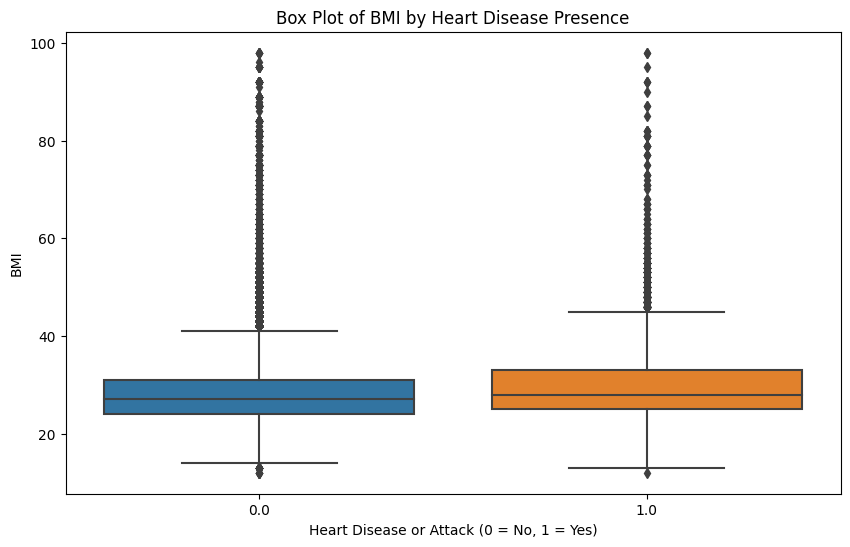

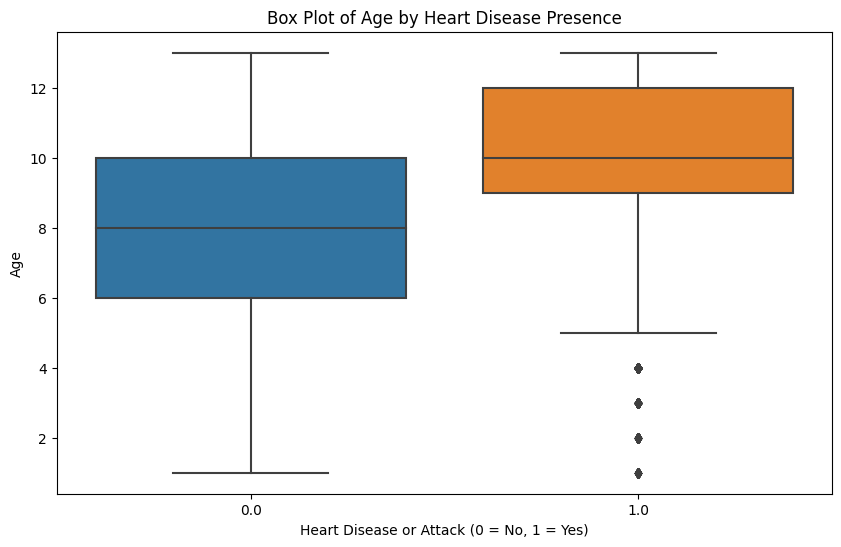

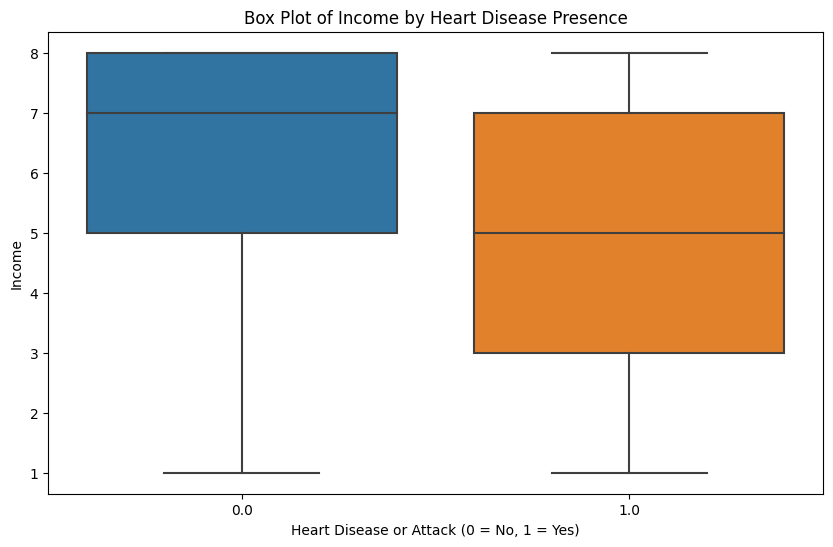

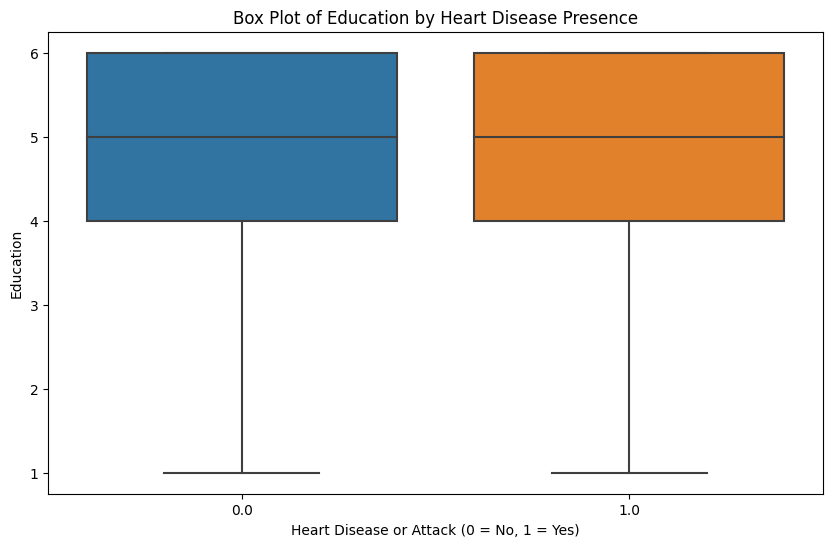

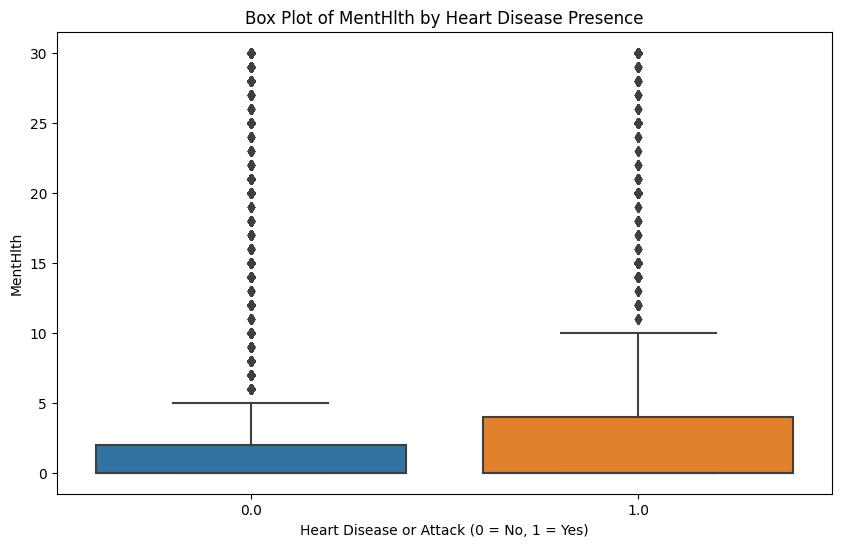

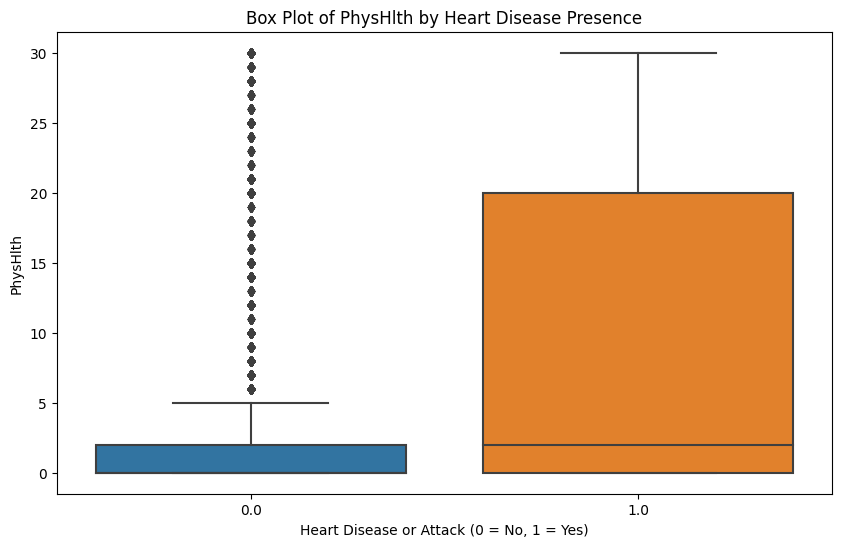

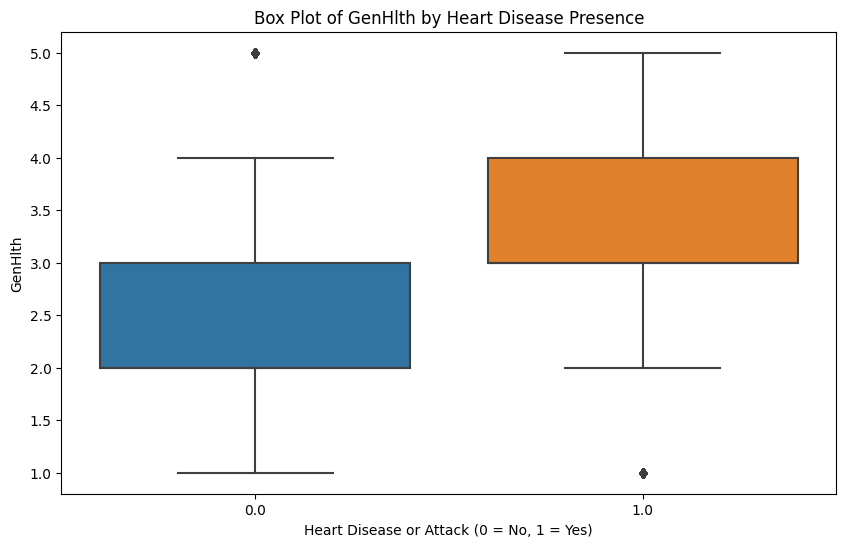

In [ ]:
# Box plots for BMI, Age, Income, MentalHealth, and PhysicalHealth against the HeartDiseaseorAttack variable
features_to_plot = ['BMI', 'Age', 'Income', 'Education', 'MentHlth', 'PhysHlth','GenHlth']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='HeartDiseaseorAttack', y=feature, data=heart_df)
    plt.title(f'Box Plot of {feature} by Heart Disease Presence')
    plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)')
    plt.ylabel(feature)
    plt.show()

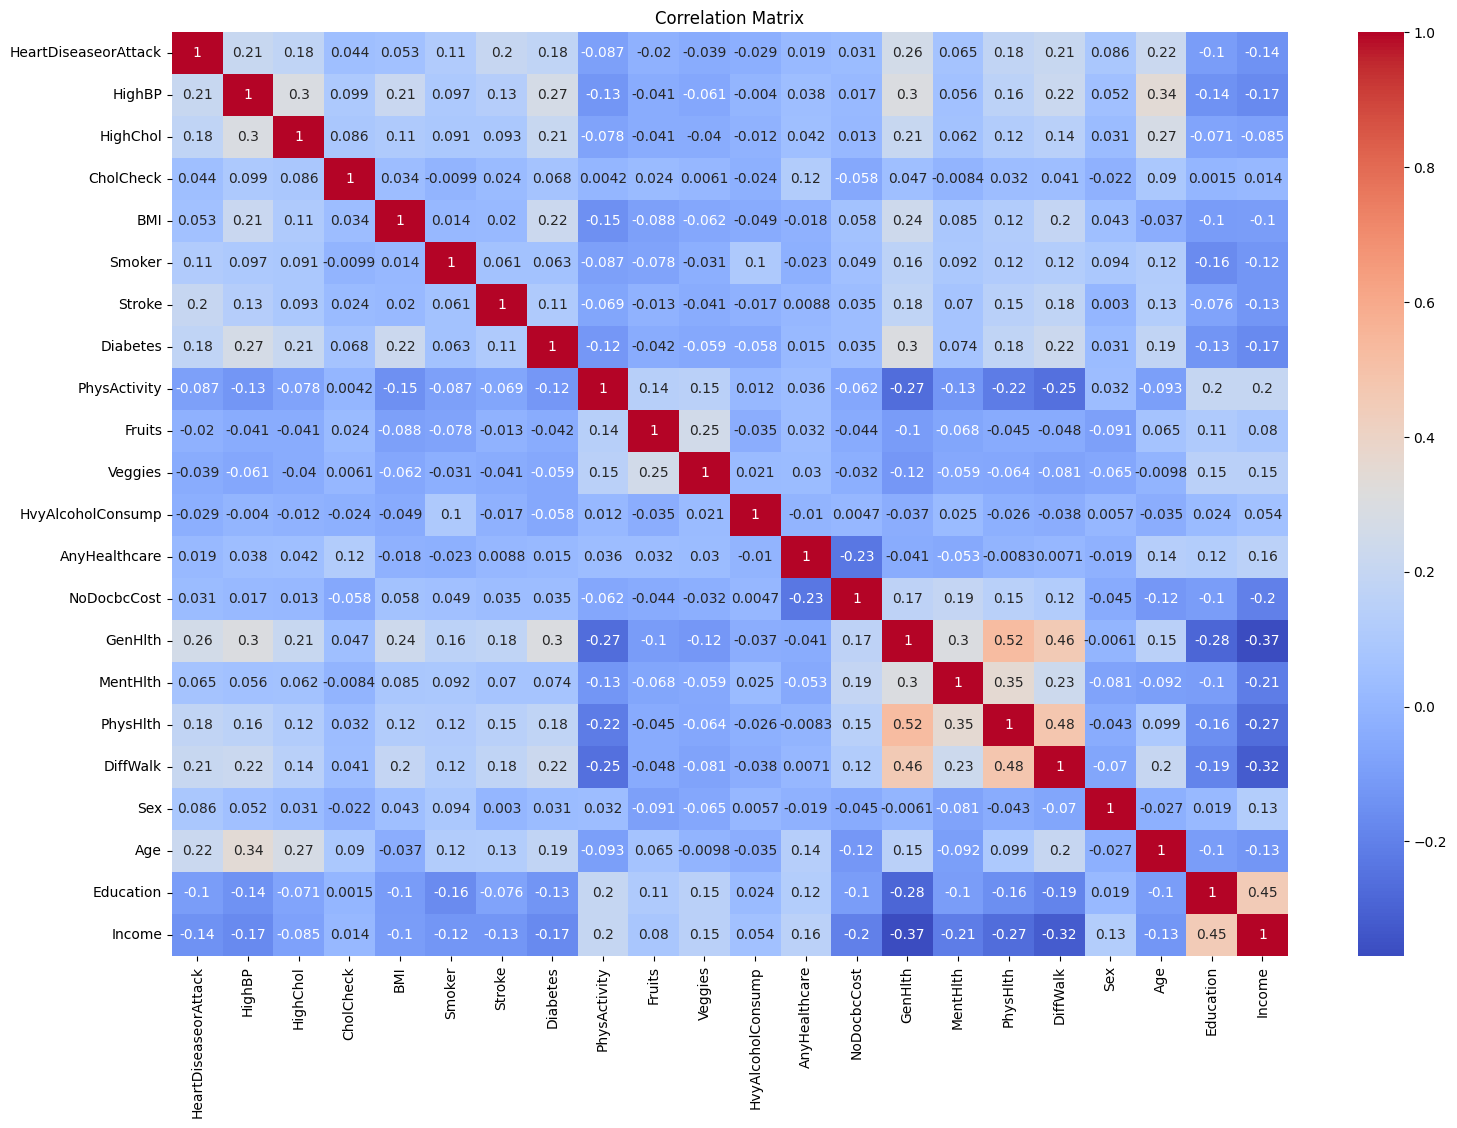

In [ ]:
# Correlation matrix
corr_matrix = heart_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
cols_to_scale = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income', 'HeartDiseaseorAttack']

corr_matrix = heart_df[cols_to_scale].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
print(upper)
cols_to_drop = ['Income', 'PhysHlth']
heart_df = heart_df.drop(['Income'], axis=1)
heart_df = heart_df.drop(['PhysHlth'], axis=1)

                      BMI   GenHlth  MentHlth  PhysHlth       Age  Education  \
BMI                   NaN  0.239185  0.085310  0.121141  0.036618   0.103932   
GenHlth               NaN       NaN  0.301674  0.524364  0.152450   0.284912   
MentHlth              NaN       NaN       NaN  0.353619  0.092068   0.101830   
PhysHlth              NaN       NaN       NaN       NaN  0.099130   0.155093   
Age                   NaN       NaN       NaN       NaN       NaN   0.101901   
Education             NaN       NaN       NaN       NaN       NaN        NaN   
Income                NaN       NaN       NaN       NaN       NaN        NaN   
HeartDiseaseorAttack  NaN       NaN       NaN       NaN       NaN        NaN   

                        Income  HeartDiseaseorAttack  
BMI                   0.100069              0.052904  
GenHlth               0.370014              0.258383  
MentHlth              0.209806              0.064621  
PhysHlth              0.266799              0.181698  
Age 

In [ ]:
cols_to_scale1 = ['BMI', 'GenHlth', 'MentHlth', 'Age', 'Education']
scaler = StandardScaler()
heart_df[cols_to_scale1] = scaler.fit_transform(heart_df[cols_to_scale1])
heart_df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,DiffWalk,Sex,Age,Education
0,0.0,1.0,1.0,1.0,1.757936,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.329121,1.998592,1.0,0.0,0.316900,-1.065595
1,0.0,0.0,0.0,0.0,-0.511806,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.457294,-0.429630,0.0,0.0,-0.337933,0.963272
2,0.0,1.0,1.0,1.0,-0.057858,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.329121,3.617407,1.0,0.0,0.316900,-1.065595
3,0.0,1.0,0.0,1.0,-0.209174,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,-0.478619,-0.429630,0.0,0.0,0.971733,-2.080028
4,0.0,1.0,1.0,1.0,-0.663122,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,-0.478619,-0.024926,0.0,0.0,0.971733,-0.051162


In [ ]:
X=heart_df.drop(['HeartDiseaseorAttack'], axis=1)
Y=heart_df['HeartDiseaseorAttack']

In [ ]:
#Applying SMOTE for imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, stratify=Y)
print(y_train.value_counts())
print(y_test.value_counts())

0.0    160851
1.0     16725
Name: HeartDiseaseorAttack, dtype: int64
0.0    68936
1.0     7168
Name: HeartDiseaseorAttack, dtype: int64


In [ ]:
# Logistic Regression without Hyperparameter Tuning
log_reg_sm = LogisticRegression()

pipeline_log = imbpipeline(steps = [['smote', SMOTE()],
                                #['scaler', StandardScaler()],
                                ['classifier', log_reg_sm]])
log_param_grid = {
    'classifier__C': [1],
    'classifier__penalty': ['l2']
}

grid_log = GridSearchCV(estimator=pipeline_log,
                           param_grid=log_param_grid, scoring='roc_auc',
                           cv=5)

grid_log.fit(X_train, y_train)
cv_score = grid_log.best_score_
best_log = grid_log.best_estimator_
print(f"Best Parameters: {grid_log.best_params_}")

# Make predictions on the test data
y_trlog = best_log.predict(X_train)
y_predlog = best_log.predict(X_test)
tr_accuracy_log = accuracy_score(y_train, y_trlog)
print(f"Training Accuracy: {tr_accuracy_log}")
test_accuracy_log = accuracy_score(y_test, y_predlog)
print(f"Test Accuracy: {test_accuracy_log}")
print(classification_report(y_test, y_predlog))
print(f"F1-Score: {f1_score(y_test, y_predlog, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predlog, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predlog, average='macro')}")

Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Training Accuracy: 0.7525566517997928
Test Accuracy: 0.7546383895721644
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     68936
         1.0       0.25      0.78      0.37      7168

    accuracy                           0.75     76104
   macro avg       0.61      0.77      0.61     76104
weighted avg       0.90      0.75      0.80     76104

F1-Score: 0.6107864801943712
Precision Score: 0.6082792184841732
Recall: 0.765435625979169


In [ ]:
# Logistic Regression with Hyperparameter Tuning
log_reg_sm = LogisticRegression()

pipeline_log = imbpipeline(steps = [['smote', SMOTE()],
                                #['scaler', StandardScaler()],
                                ['classifier', log_reg_sm]])
log_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__penalty': ['l1', 'l2']
}

grid_log = GridSearchCV(estimator=pipeline_log,
                           param_grid=log_param_grid, scoring='roc_auc',
                           cv=5)

grid_log.fit(X_train, y_train)
cv_score = grid_log.best_score_
best_log = grid_log.best_estimator_
print(f"Best Parameters: {grid_log.best_params_}")

# Make predictions on the test data
y_trlog = best_log.predict(X_train)
y_predlog = best_log.predict(X_test)
tr_accuracy_log = accuracy_score(y_train, y_trlog)
print(f"Training Accuracy: {tr_accuracy_log}")
test_accuracy_log = accuracy_score(y_test, y_predlog)
print(f"Test Accuracy: {test_accuracy_log}")
print(classification_report(y_test, y_predlog))
print(f"F1-Score: {f1_score(y_test, y_predlog, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predlog, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predlog, average='macro')}")

Best Parameters: {'classifier__C': 0.001, 'classifier__penalty': 'l2'}
Training Accuracy: 0.7466718475469658
Test Accuracy: 0.7496189424997372
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.84     68936
         1.0       0.24      0.79      0.37      7168

    accuracy                           0.75     76104
   macro avg       0.61      0.77      0.61     76104
weighted avg       0.90      0.75      0.80     76104

F1-Score: 0.6082716551033553
Precision Score: 0.6078314624641292
Recall: 0.767977555721974


AUC for logistic regression: 0.8453935961419053


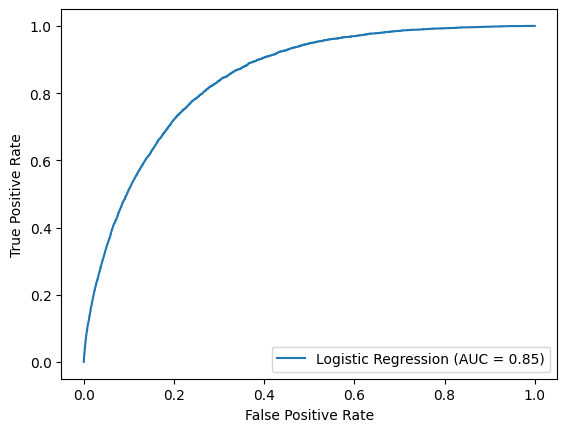

In [ ]:
  from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
log_cm = confusion_matrix(y_test, y_predlog)
y_pred_probalog = best_log.predict_proba(X_test)[:,1]
best_log.predict_proba(X_test).shape
best_log.predict_proba(X_test)[ : , 1 ]
auc_lr = roc_auc_score(y_test, y_pred_probalog)
print("AUC for logistic regression:", roc_auc_score(y_test, y_pred_probalog)  )
FPR, TPR, threshold = roc_curve(y_test, y_pred_probalog)
plt.plot(FPR, TPR, label='Logistic Regression (AUC = {:.2f})'.format(auc_lr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

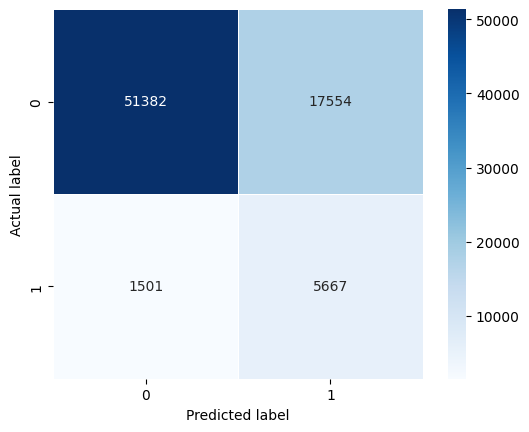

In [ ]:
sns.heatmap(log_cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Decision Tree without Hyper parameter tuning
dt_sm = DecisionTreeClassifier(random_state = 0)

pipeline_dt = imbpipeline(steps = [['smote', SMOTE()],
                                #['scaler', StandardScaler()],
                                ['classifier', dt_sm]])


pipeline_dt.fit(X_train, y_train)
#cv_score_dt = grid_dtsm.best_score_
#best_dtsm = grid_dtsm.best_estimator_
#print(f"Best Parameters: {grid_dtsm.best_params_}")

# Make predictions on the test data
y_trdm = pipeline_dt.predict(X_train)
y_preddtsm = pipeline_dt.predict(X_test)
dt_train_accuracy = accuracy_score(y_train, y_trdm)
print(f"Training Accuracy: {dt_train_accuracy}")
dt_test_accuracy = accuracy_score(y_test, y_preddtsm)
print(f"Test Accuracy: {dt_test_accuracy}")
print(classification_report(y_test, y_preddtsm))
print(f"F1-Score: {f1_score(y_test, y_preddtsm, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_preddtsm, average='macro')}")
print(f"Recall: {recall_score(y_test, y_preddtsm, average='macro')}")

Training Accuracy: 0.9961650223003109
Test Accuracy: 0.8517949122253758
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     68936
         1.0       0.25      0.29      0.27      7168

    accuracy                           0.85     76104
   macro avg       0.59      0.60      0.59     76104
weighted avg       0.86      0.85      0.86     76104

F1-Score: 0.5920358836936865
Precision Score: 0.5871041306347409
Recall: 0.5982477746569281


AUC for logistic regression: 0.6018591639071411


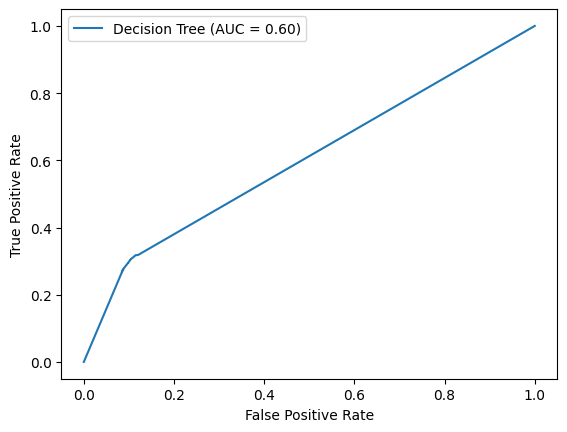

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
y_pred_probadt2 = pipeline_dt.predict_proba(X_test)[:,1]
pipeline_dt.predict_proba(X_test).shape
pipeline_dt.predict_proba(X_test)[ : , 1 ]
auc_dt2 = roc_auc_score(y_test, y_pred_probadt2)
print("AUC for logistic regression:", roc_auc_score(y_test, y_pred_probadt2)  )
FPR, TPR, threshold = roc_curve(y_test, y_pred_probadt2)
plt.plot(FPR, TPR, label='Decision Tree (AUC = {:.2f})'.format(auc_dt2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Decision Tree with Hyper parameter tuning
dt_sm = DecisionTreeClassifier(random_state = 0)

pipeline_dt = imbpipeline(steps = [['smote', SMOTE()],
                                #['scaler', StandardScaler()],
                                ['classifier', dt_sm]])
dt_params_sm = {'classifier__max_depth':  range(2,12)      ,
             'classifier__criterion': ['gini', 'entropy'] }
grid_dtsm = GridSearchCV(estimator=pipeline_dt,
                           param_grid=dt_params_sm,
                           scoring='roc_auc',
                           cv=5)

grid_dtsm.fit(X_train, y_train)
cv_score_dt = grid_dtsm.best_score_
best_dtsm = grid_dtsm.best_estimator_
print(f"Best Parameters: {grid_dtsm.best_params_}")

# Make predictions on the test data
y_trdm = best_dtsm.predict(X_train)
y_preddtsm = best_dtsm.predict(X_test)
dt_train_accuracy = accuracy_score(y_train, y_trdm)
print(f"Training Accuracy: {dt_train_accuracy}")
print(f'Cross-validation score: {cv_score_dt}')
dt_test_accuracy = accuracy_score(y_test, y_preddtsm)
print(f"Test Accuracy: {dt_test_accuracy}")
print(classification_report(y_test, y_preddtsm))
print(f"F1-Score: {f1_score(y_test, y_preddtsm, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_preddtsm, average='macro')}")
print(f"Recall: {recall_score(y_test, y_preddtsm, average='macro')}")

Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10}
Training Accuracy: 0.8441962877866378
Cross-validation score: 0.821031716780858
Test Accuracy: 0.842439293598234
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91     68936
         1.0       0.31      0.53      0.39      7168

    accuracy                           0.84     76104
   macro avg       0.63      0.70      0.65     76104
weighted avg       0.89      0.84      0.86     76104

F1-Score: 0.6484821778460539
Precision Score: 0.6262938093082997
Recall: 0.7019609334201289


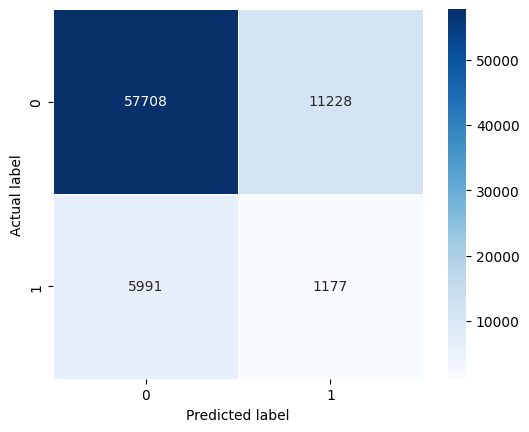

In [ ]:
dt2_cm = confusion_matrix(y_test, y_preddtsm)
sns.heatmap(dt2_cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

AUC for logistic regression: 0.8305362494045331


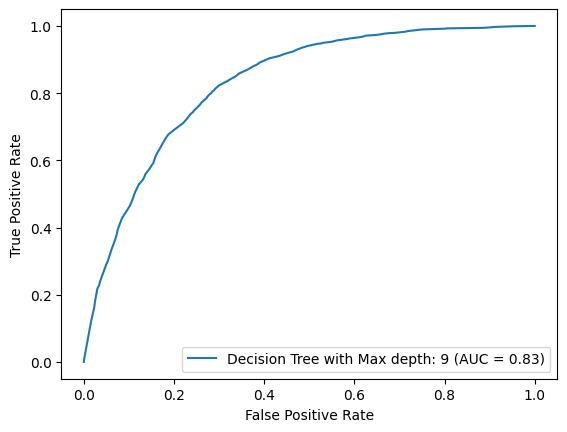

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
y_pred_probadt2 = best_dtsm.predict_proba(X_test)[:,1]
best_dtsm.predict_proba(X_test).shape
best_dtsm.predict_proba(X_test)[ : , 1 ]
auc_dt2 = roc_auc_score(y_test, y_pred_probadt2)
print("AUC for logistic regression:", roc_auc_score(y_test, y_pred_probadt2)  )
FPR, TPR, threshold = roc_curve(y_test, y_pred_probadt2)
plt.plot(FPR, TPR, label='Decision Tree with Max depth: 9 (AUC = {:.2f})'.format(auc_dt2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

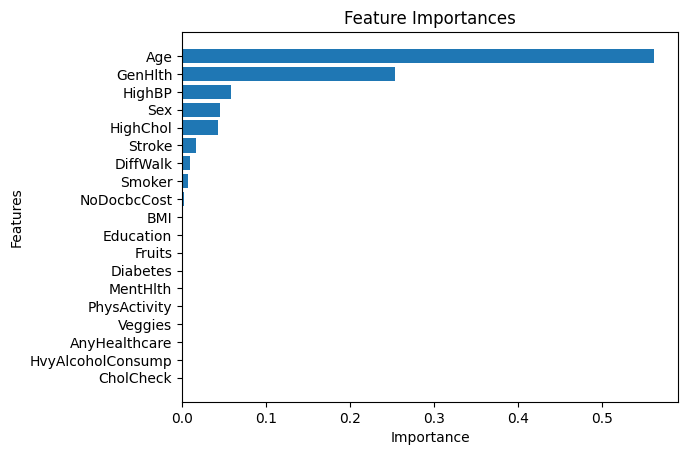

In [ ]:
dt_importances = best_dtsm.named_steps['classifier'].feature_importances_
dt_importances = pd.DataFrame({'feature':X_train.columns,'importance':dt_importances})
dt_importances = dt_importances.sort_values('importance',ascending=True)
dt_importances = dt_importances.set_index('feature')
plt.barh(dt_importances.index, dt_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

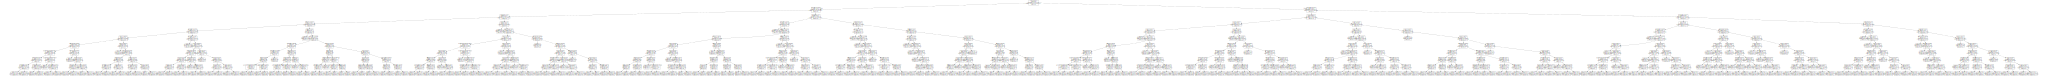

<Figure size 2000x1000 with 0 Axes>

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
fig = plt.figure(figsize=(8,8))
# Create the decision tree graph in dot format
dot_data = export_graphviz(best_dtsm.named_steps['classifier'], feature_names=X_train.columns, class_names=['0','1'])
# Draw the decision tree graph
graph = graphviz.Source(dot_data)
graph


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, stratify=Y)
print(y_train.value_counts())
print(y_test.value_counts())

0.0    160851
1.0     16725
Name: HeartDiseaseorAttack, dtype: int64
0.0    68936
1.0     7168
Name: HeartDiseaseorAttack, dtype: int64


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, stratify=Y)
rf_sm = RandomForestClassifier(random_state = 42)

pipeline_rf = imbpipeline(steps = [['smote', SMOTE()],
                                #['scaler', StandardScaler()],
                                ['classifier', rf_sm]])
rf_params_sm = { 'classifier__n_estimators': [100],
                 'classifier__max_depth': range(2,6) }
grid_rfsm = GridSearchCV(estimator=pipeline_rf,
                           param_grid=rf_params_sm,
                           scoring='roc_auc',
                           cv=5)

grid_rfsm.fit(X_train, y_train)
cv_score_rf = grid_rfsm.best_score_
best_rfsm = grid_rfsm.best_estimator_
print(f"Best Parameters: {grid_rfsm.best_params_}")

# Make predictions on the test data
y_trrf = best_rfsm.predict(X_train)
y_predrfsm = best_rfsm.predict(X_test)
rf_train_accuracy = accuracy_score(y_train, y_trrf)
print(f"Training Accuracy: {rf_train_accuracy}")
print(f'Cross-validation score: {cv_score_rf}')
rf_test_accuracy = accuracy_score(y_test, y_predrfsm)
print(f"Test Accuracy: {rf_test_accuracy}")
print(classification_report(y_test, y_predrfsm))
print(f"F1-Score: {f1_score(y_test, y_predrfsm, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predrfsm, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predrfsm, average='macro')}")

Best Parameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Training Accuracy: 0.7537279812587286
Cross-validation score: 0.8368677964611905
Test Accuracy: 0.7539945337958583
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     68936
         1.0       0.24      0.76      0.37      7168

    accuracy                           0.75     76104
   macro avg       0.61      0.76      0.61     76104
weighted avg       0.90      0.75      0.80     76104

F1-Score: 0.6080434196332254
Precision Score: 0.6057715339348727
Recall: 0.7581425729118312


[[55722 13214]
 [ 2232  4936]]


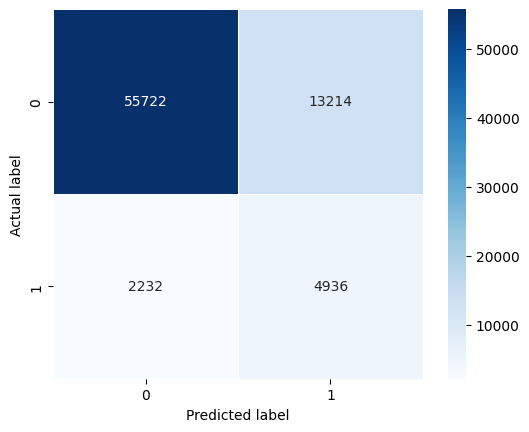

In [ ]:
rf_cm = confusion_matrix(y_test, y_predrfsm)
print(rf_cm)
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

AUC for Random Forest: 0.8396658668068415


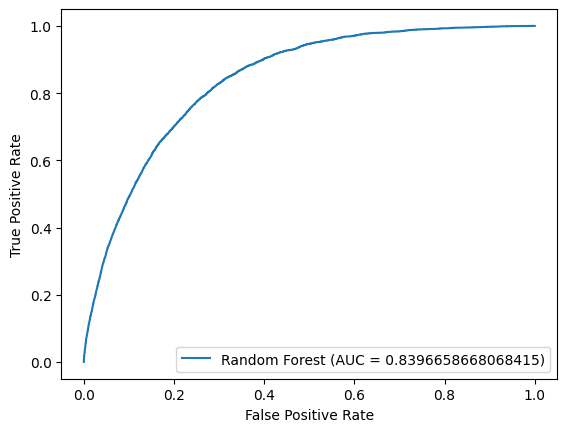

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

y_pred_probarf = best_rfsm.predict_proba(X_test)[:,1]
best_rfsm.predict_proba(X_test).shape
best_rfsm.predict_proba(X_test)[ : , 1 ]
auc_rf = roc_auc_score(y_test, y_pred_probarf)
print("AUC for Random Forest:", roc_auc_score(y_test, y_pred_probarf)  )
FPR, TPR, threshold = roc_curve(y_test, y_pred_probarf)
plt.plot(FPR, TPR, label='Random Forest (AUC = {})'.format(auc_rf))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

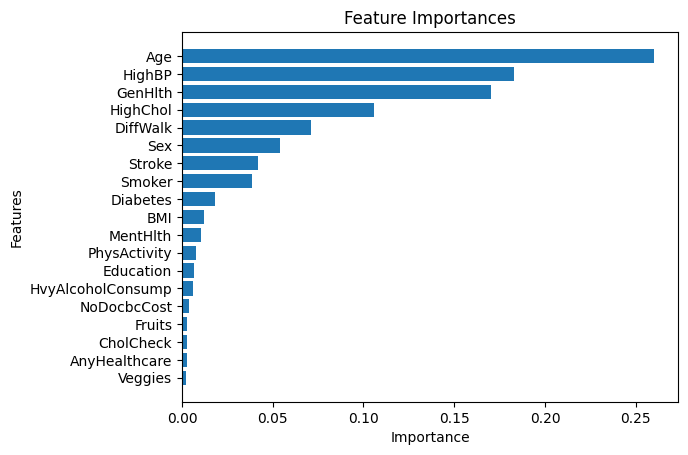

In [ ]:
rf_importances = best_rfsm.named_steps['classifier'].feature_importances_
rf_importances = pd.DataFrame({'feature':X_train.columns,'importance':rf_importances})
rf_importances = rf_importances.sort_values('importance',ascending=True)
rf_importances = rf_importances.set_index('feature')
plt.barh(rf_importances.index, rf_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [ ]:
#SVM Classifier
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, stratify=Y)

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(random_state = 22)

pipeline_svc = imbpipeline(steps = [['smote', SMOTE()],
                                #['scaler', StandardScaler()],
                                ['classifier', linear_svc]])

pipeline_svc.fit(X_train, y_train)

# Make predictions on the test data
y_trsvc = pipeline_svc.predict(X_train)
tr_accuracy_svc = accuracy_score(y_train, y_trsvc)
print(f"Training Accuracy: {tr_accuracy_svc}")
y_predsvc = pipeline_svc.predict(X_test)
test_accuracy_svc = accuracy_score(y_test, y_predsvc)
print(f"Test Accuracy: {test_accuracy_svc}")
print(classification_report(y_test, y_predsvc))
print(f"F1-Score: {f1_score(y_test, y_predsvc, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predsvc, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predsvc, average='macro')}")

Training Accuracy: 0.7466211650223004
Test Accuracy: 0.7455849889624724
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84     68936
         1.0       0.24      0.79      0.37      7168

    accuracy                           0.75     76104
   macro avg       0.61      0.77      0.61     76104
weighted avg       0.90      0.75      0.80     76104

F1-Score: 0.6053683116061059
Precision Score: 0.606595698236356
Recall: 0.767125882612133


[[51053 17883]
 [ 1479  5689]]


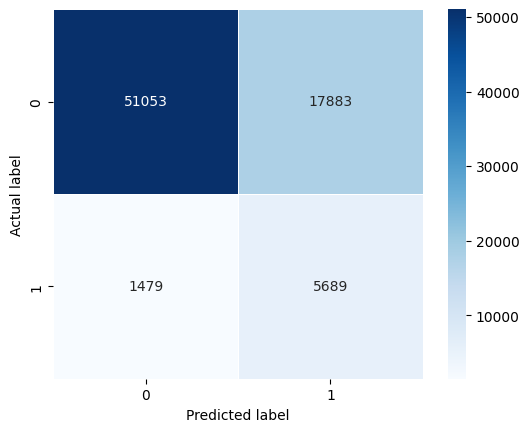

In [ ]:
svc_cm = confusion_matrix(y_test, y_predsvc)
print(svc_cm)
sns.heatmap(svc_cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#Guassian Kernel SVM
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, stratify=Y)

kr_svc = SVC(random_state = 22)

pipeline_ksvc = imbpipeline(steps = [['smote', SMOTE()],
                                #['scaler', StandardScaler()],
                                ['classifier', kr_svc]])

pipeline_ksvc.fit(X_train, y_train)

# Make predictions on the test data
y_trksvc = pipeline_ksvc.predict(X_train)
tr_accuracy_ksvc = accuracy_score(y_train, y_trksvc)
print(f"Training Accuracy: {tr_accuracy_ksvc}")
y_predksvc = pipeline_ksvc.predict(X_test)
test_accuracy_ksvc = accuracy_score(y_test, y_predksvc)
print(f"Test Accuracy: {test_accuracy_ksvc}")
print(classification_report(y_test, y_predksvc))
print(f"F1-Score: {f1_score(y_test, y_predksvc, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predksvc, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predksvc, average='macro')}")

Training Accuracy: 0.7946287786637833
Test Accuracy: 0.7867786187322611
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87     68936
         1.0       0.26      0.69      0.38      7168

    accuracy                           0.79     76104
   macro avg       0.61      0.74      0.62     76104
weighted avg       0.89      0.79      0.82     76104

F1-Score: 0.6244006472188346
Precision Score: 0.6104962489575287
Recall: 0.7417383175155217


[[54958 13978]
 [ 2249  4919]]


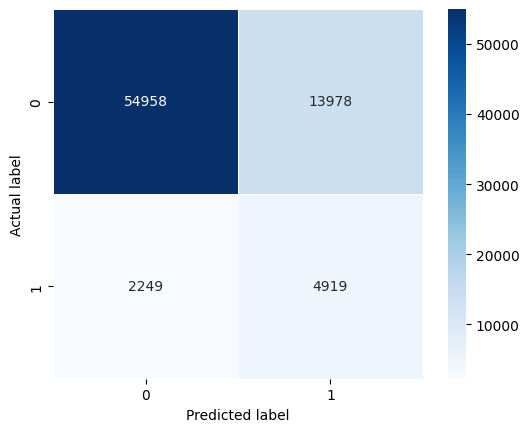

In [ ]:
ksvc_cm = confusion_matrix(y_test, y_predksvc)
print(ksvc_cm)
sns.heatmap(ksvc_cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, stratify=Y)

knn_sm = KNeighborsClassifier()

pipeline_knn = imbpipeline(steps = [['smote', SMOTE()],
                                #['scaler', StandardScaler()],
                                ['classifier', knn_sm]])

pipeline_knn.fit(X_train, y_train)

# Make predictions on the test data
y_trknn = pipeline_knn.predict(X_train)
tr_accuracy_knn = accuracy_score(y_train, y_trknn)
print(f"Training Accuracy: {tr_accuracy_knn}")
y_predknn = pipeline_knn.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, y_predknn)
print(f"Test Accuracy: {test_accuracy_knn}")
print(classification_report(y_test, y_predknn))
print(f"F1-Score: {f1_score(y_test, y_predknn, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predknn, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predknn, average='macro')}")

Training Accuracy: 0.8689124656485111
Test Accuracy: 0.7845973930411017
              precision    recall  f1-score   support

         0.0       0.95      0.81      0.87     68936
         1.0       0.23      0.55      0.33      7168

    accuracy                           0.78     76104
   macro avg       0.59      0.68      0.60     76104
weighted avg       0.88      0.78      0.82     76104

F1-Score: 0.5991885306043022
Precision Score: 0.5886285998375219
Recall: 0.6815330183974991


[[55736 13200]
 [ 3193  3975]]


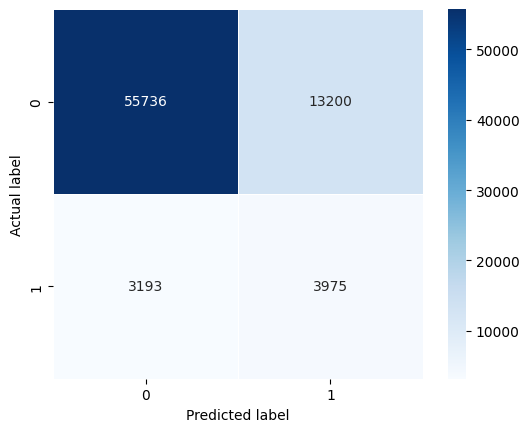

In [ ]:
knn_cm = confusion_matrix(y_test, y_predknn)
print(knn_cm)
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

AUC for KNN: 0.7372498854802824


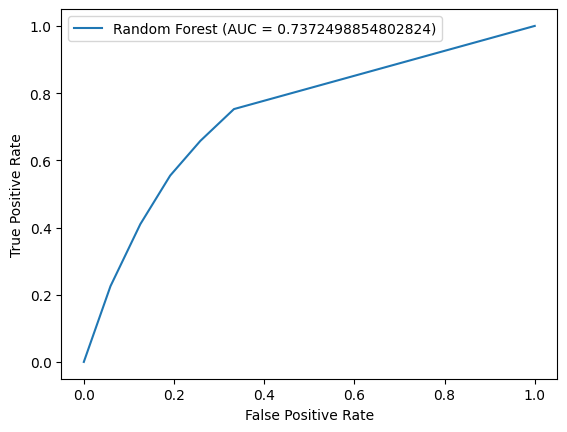

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
y_pred_probaknn = pipeline_knn.predict_proba(X_test)[:,1]
pipeline_knn.predict_proba(X_test).shape
pipeline_knn.predict_proba(X_test)[ : , 1 ]
auc_knn = roc_auc_score(y_test, y_pred_probaknn)
print("AUC for KNN:", roc_auc_score(y_test, y_pred_probaknn)  )
FPR, TPR, threshold = roc_curve(y_test, y_pred_probaknn)
plt.plot(FPR, TPR, label='KNN (AUC = {})'.format(auc_knn))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, stratify=Y)

knn_sm = KNeighborsClassifier(n_neighbors = 20)

pipeline_knn = imbpipeline(steps = [['smote', SMOTE()],
                                #['scaler', StandardScaler()],
                                ['classifier', knn_sm]])

pipeline_knn.fit(X_train, y_train)

# Make predictions on the test data
y_trknn = pipeline_knn.predict(X_train)
tr_accuracy_knn = accuracy_score(y_train, y_trknn)
print(f"Training Accuracy: {tr_accuracy_knn}")
y_predknn = pipeline_knn.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, y_predknn)
print(f"Test Accuracy: {test_accuracy_knn}")
print(classification_report(y_test, y_predknn))
print(f"F1-Score: {f1_score(y_test, y_predknn, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predknn, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predknn, average='macro')}")

Training Accuracy: 0.7766026940577555
Test Accuracy: 0.7419058130978661
              precision    recall  f1-score   support

         0.0       0.96      0.74      0.84     68936
         1.0       0.23      0.71      0.34      7168

    accuracy                           0.74     76104
   macro avg       0.59      0.73      0.59     76104
weighted avg       0.89      0.74      0.79     76104

F1-Score: 0.5908688581111287
Precision Score: 0.5933395187607986
Recall: 0.7289692273449286


In [ ]:
# LightGBM
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, stratify=Y)

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state = 0)

pipeline_lgbm = imbpipeline(steps = [['smote', SMOTE()],
                                #['scaler', StandardScaler()],
                                ['classifier', lgbm]])

pipeline_lgbm.fit(X_train, y_train)

# Make predictions on the test data
y_trlgbm = pipeline_lgbm.predict(X_train)
tr_accuracy_lgbm = accuracy_score(y_train, y_trlgbm)
print(f"Training Accuracy: {tr_accuracy_lgbm}")
y_predlgbm = pipeline_lgbm.predict(X_test)
test_accuracy_lgbm = accuracy_score(y_test, y_predlgbm)
print(f"Test Accuracy: {test_accuracy_lgbm}")
print(classification_report(y_test, y_predlgbm))
print(f"F1-Score: {f1_score(y_test, y_predlgbm, average='macro')}")
print(f"Precision Score: {precision_score(y_test, y_predlgbm, average='macro')}")
print(f"Recall: {recall_score(y_test, y_predlgbm, average='macro')}")

[LightGBM] [Info] Number of positive: 160851, number of negative: 160851
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 321702, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Accuracy: 0.9039847727170338
Test Accuracy: 0.9023441606223063
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     68936
         1.0       0.46      0.21      0.29      7168

    accuracy                           0.90     76104
   macro avg       0.69      0.59      0.62     76104
weighted avg       0.88      0.90      0.89     76104

F1-Score: 0.6181205255134317
Precision Score: 0.691017233664592
Recall: 0.5923372312724846
